![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras import backend as K
from keras.layers import Dense
from keras.layers import Dropout
from livelossplot import PlotLossesKeras
from keras.layers import Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import StandardScaler

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


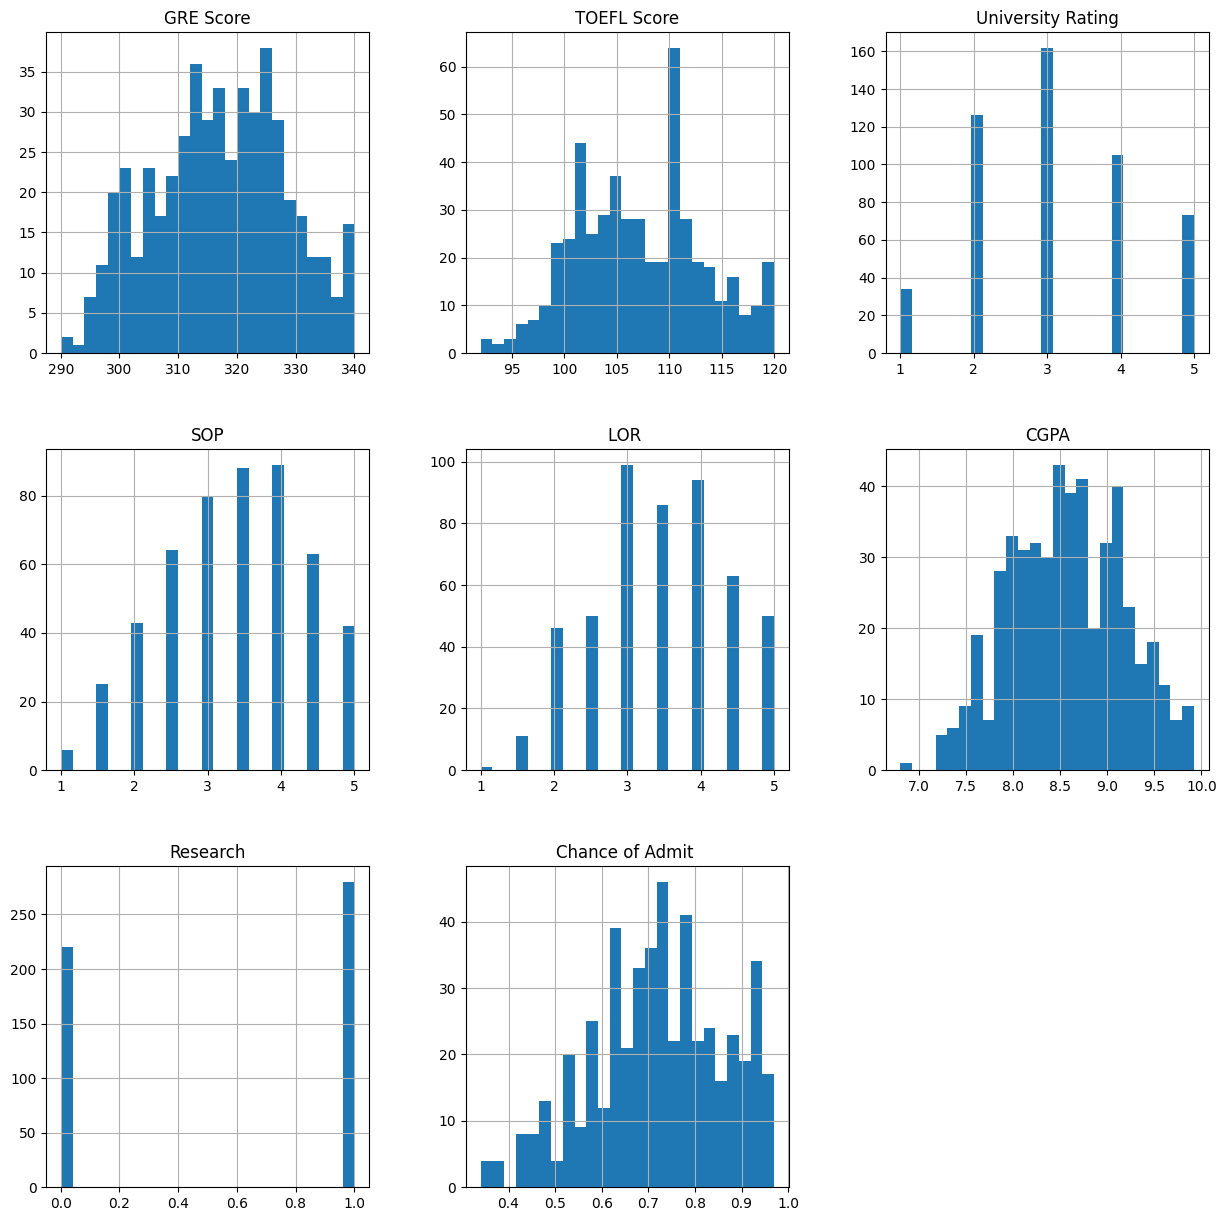

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
# Celda 1
# Definir cantidad de datos de salida
output_var = 1

# Definir cantidad datos de entrada
dims = xTrain.shape[1]

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [8]:
# Limpiar configuracion keras
K.clear_session()

# Establecer randon state para el modelo
keras.utils.set_random_seed(22)

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

None


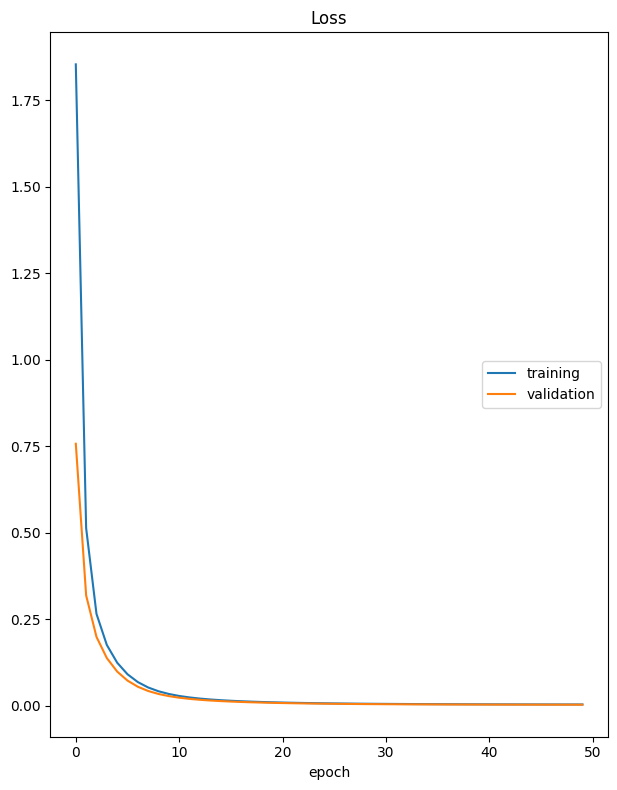

Loss
	training         	 (min:    0.004, max:    1.854, cur:    0.004)
	validation       	 (min:    0.003, max:    0.758, cur:    0.003)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0043 - val_loss: 0.0034


In [9]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [10]:
# Predecir los valores para el set x Test
y_pred = model.predict(xTest)

# Metrica de MSE
mse_model1 = mean_squared_error(yTest, y_pred)

# Metrica de MAE
mae_model1 = mean_absolute_error(yTest, y_pred)

print("MSE red neuronal simple:", mse_model1)
print("MAE red neuronal simple:", mae_model1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE red neuronal simple: 0.003356167029530441
MAE red neuronal simple: 0.042069058132171634


#### Análisis punto 1

La arquitectura de la red neuronal consta de una sola capa densa con una neurona de salida, lo que la hace simple y lineal, se emplea la función de pérdida de error cuadrático medio (MSE) y el optimizador SGD (Stochastic Gradient Descent). MSE es común en problemas de regresión, ya que penaliza los errores grandes, mientras que SGD es adecuado pero puede necesitar ajustes en la tasa de aprendizaje y otros hiperparámetros para mejorar el rendimiento del modelo.

El modelo se entrenó durante 50 épocas, se identifica que el modelo converge alrededor de la epoca 20.

El modelo obtuvo un error cuadrático medio (MSE) de aproximadamente 0.003356 y un error absoluto medio (MAE) de aproximadamente 0.04206 en el conjunto de datos de prueba.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [11]:
# Celda 2

# Limpiar configuracion keras
K.clear_session()

# Establecer randon state para el modelo
keras.utils.set_random_seed(22)

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(300, input_shape=(dims,),activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           301 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,001 (363.29 KB)

 Trainable params: 93,001 (363.29 KB)

 Non-trainable params: 0 (0.00 B)

None


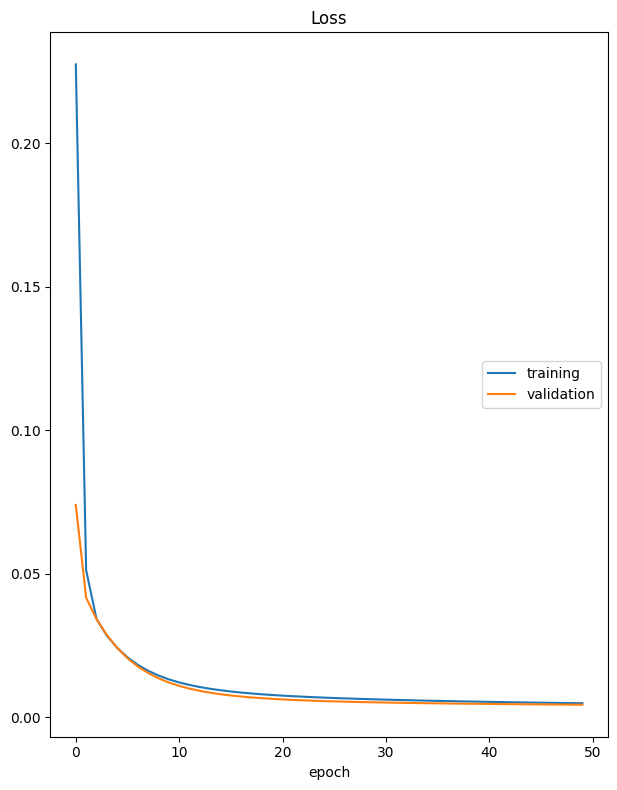

Loss
	training         	 (min:    0.005, max:    0.227, cur:    0.005)
	validation       	 (min:    0.004, max:    0.074, cur:    0.004)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - val_loss: 0.0044


In [12]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

In [13]:
# Predecir los valores para el set x Test
y_pred = model.predict(xTest)

# Metrica de MSE
mse_model2 =mean_squared_error(yTest, y_pred)

# Metrica de MAE
mae_model2 = mean_absolute_error(yTest, y_pred)

print("MSE red neuronal de 2 capas:", mse_model2)
print("MAE red neuronal de 2 capas:", mae_model2)



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE red neuronal de 2 capas: 0.004394991544053518
MAE red neuronal de 2 capas: 0.0521152003924052


#### Análisis punto 2
La red neuronal está compuesta por dos capas ocultas, cada una con 300 neuronas y función de activación ReLU, seguidas de una capa de salida con una sola neurona. Esto proporciona una arquitectura más compleja y no lineal en comparación con el modelo de una sola capa.

El modelo de dos capas obtuvo un error cuadrático medio (MSE) de aproximadamente 0.004394 y un error absoluto medio (MAE) de aproximadamente 0.052115 en el conjunto de datos de prueba.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [14]:
# Celda 3

# Limpiar configuracion keras
K.clear_session()

# Establecer randon state para el modelo
keras.utils.set_random_seed(22)

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definir el dropOut para la red neuronal
model.add(Dropout(0.2, input_shape=(dims,)))

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(300, input_shape=(dims,),activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           301 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,001 (363.29 KB)

 Trainable params: 93,001 (363.29 KB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [16]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.keras'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

In [17]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[best_model, early_stop])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5316 - val_loss: 0.4234
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3485 - val_loss: 0.1232
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0828 - val_loss: 0.0687
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0506 - val_loss: 0.0470
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0362 - val_loss: 0.0371
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0305 - val_loss: 0.0308
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0261 - val_loss: 0.0261
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0226 - val_loss: 0.0221
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0219 - val_loss: 0.0193
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0171 - val_loss: 0.0173
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0162 - val_loss: 0.0150
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0150 - val_lo

In [18]:
# Predecir los valores para el set x Test
y_pred = model.predict(xTest)

# Metrica de MSE
mse_model3 =mean_squared_error(yTest, y_pred)

# Metrica de MAE
mae_model3 = mean_absolute_error(yTest, y_pred)

print("MSE red neuronal multicapa con Early Stopping y Dropout:", mse_model3)
print("MAE red neuronal multicapa con Early Stopping y Dropout:", mae_model3)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000186D976A840> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE red neuronal multicapa con Early Stopping y Dropout: 0.007635911534283656
MAE red neuronal multicapa con Early Stopping y Dropout: 0.07520922869046529


#### Análisis punto 3

Se implementaron técnicas como dropout y early stopping para evitar el sobreajuste del modelo. Dropout se utilizó antes de la primera capa para evitar la dependencia entre las neuronas, lo que ayuda a mejorar la generalización del modelo. Early stopping se utilizó para detener el entrenamiento cuando la pérdida en el conjunto de validación dejó de disminuir, lo que evita que el modelo continúe entrenándose demasiado y se ajuste demasiado a los datos de entrenamiento "overfitting".

La red neuronal tiene una arquitectura similar a la del punto 2, con dos capas ocultas de 300 neuronas cada una y una capa de dropout entre ellas. Sin embargo, se agregó la función de dropout para mejorar la generalización del modelo.

El modelo con dropout y early stopping obtuvo un error cuadrático medio (MSE) de aproximadamente 0.00763 y un error absoluto medio (MAE) de aproximadamente 0.075209 en el conjunto de datos de prueba. Estos resultados indican que el modelo sigue teniendo un buen rendimiento y una capacidad de generalización aceptable, lo que confirma la efectividad de las técnicas implementadas.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

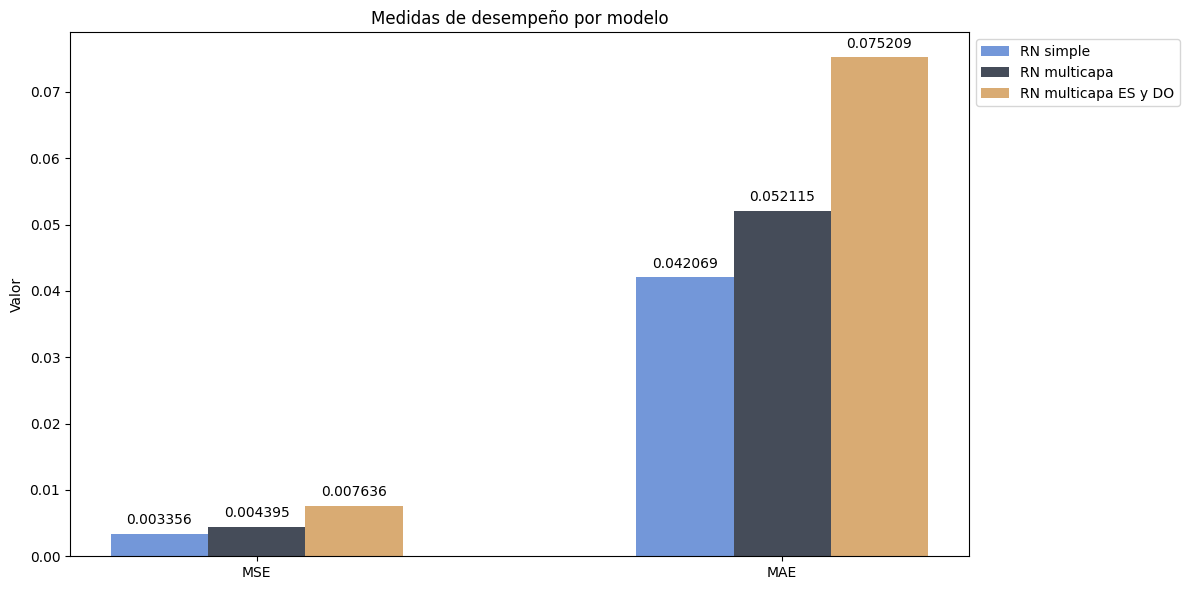

In [19]:
# Celda 4

# Comparar las evaluaciones de poder predictivo de los diferentes modelos
medidas = ['MSE', 'MAE']
modelos = {
    'RN simple': [mse_model1, mae_model1],
    'RN multicapa': [mse_model2, mae_model2],
    'RN multicapa ES y DO': [mse_model3, mae_model3],
}

# Formato de colores para las barras
colores_modelos = ['#7397D9', '#454C59', '#D9AB73']

# Configuración de las dimensiones de figura
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.185
index = np.arange(len(medidas))

# Graficamos las barras con el valor obtenido en cada modelo para las medidas, redondeado a 2 cifras decimales las etiquetas
for i, (nombre_modelo, valores) in enumerate(modelos.items()):
    etiquetas = [f'{round(valor, 6):.6f}' for valor in valores]  # Redondear valores a 2 decimales y convertir a cadena
    ax.bar(index + i * bar_width, valores, bar_width, label=nombre_modelo, color=colores_modelos[i % len(colores_modelos)])
    for j, etiqueta in enumerate(etiquetas):
        ax.text(index[j] + i * bar_width, valores[j] + 0.001, etiqueta, ha='center', va='bottom')


# Ajustes de la figura
ax.set_xlabel('')
ax.set_ylabel('Valor')
ax.set_title('Medidas de desempeño por modelo')
ax.set_xticks(index + (len(modelos) - 1) * bar_width / 2)
ax.set_xticklabels(medidas)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Al comparar los resultados del MSE, podemos observar que el primer modelo tuvo el menor MSE, seguido por el segundo modelo y luego el tercer modelo. Esto indica que la red neuronal más simple, con una sola capa densa, logró el mejor rendimiento en términos de MSE en este conjunto de datos específico. Es importante destacar que el tercer punto, aunque tuvo un MSE ligeramente más alto, incorporó técnicas de regularización como dropout y early stopping, lo que puede mejorar la capacidad de generalización del modelo y evitar el sobreajuste a costa de un ligero aumento en el MSE.

En cuanto al MAE el tercer modelo, que incorporó técnicas de regularización como dropout y early stopping, tuvo el MAE más alto de los tres modelos, lo que sugiere una disminución adicional en la precisión del modelo. Esto puede ser atribuible a la introducción de dropout, que aleatoriamente desactiva conexiones entre neuronas durante el entrenamiento, lo que puede afectar negativamente la precisión del modelo.

Aunque el primer modelo obtuvo el mejor rendimiento en términos de MSE, el tercer modelo muestra la importancia de considerar técnicas de regularización para mejorar la generalización del modelo, incluso si eso significa un ligero aumento en el error cuadrático medio.